In [95]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations

In [96]:
x=os.listdir('data/')
x=[y for y in x if ((".csv" in y) and (y[0]=='_'))]
ph=1.5574E-4

In [97]:
path="C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"
data1=pd.read_csv(path+"/_AAMLGQEDPPQHGLPR_3_24_FAS_MOUSE.csv")
data2=pd.read_csv(path+"/_AAMLGQEDPPQHGLPR_3_24_FAS_MOUSE.csv")
data1.head()

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,NH
0,32,0.0489,0.022307,0.937179,0.978597,2.582967,2.746752,118
1,32,0.0490,0.022117,0.937179,0.978597,2.586506,2.746752,118
2,32,0.0491,0.021927,0.937179,0.978597,2.590045,2.746752,118
3,32,0.0492,0.021739,0.937179,0.978597,2.593586,2.746752,118
4,32,0.0493,0.021553,0.937179,0.978597,2.597127,2.746752,118


In [114]:

md=data1.merge(data2,how='cross')
md=md.query('NEH_x == NEH_y') 
md["RMSE"]= md["RMSE_x"] + md["RMSE_y"]
md=md.sort_values(by=["RMSE"],ascending=True)

md["const_x"]=md.NEH_x*md.pxt_x
md["new_pxt_x"]=1-ph- (md.const_x/( (1-ph)*(md["exp_t_A1/A0_x"]-md["theo_A1/A0_x"]) ) )
md["new_neh_x"]=md.const_x/md.new_pxt_x

md["const_y"]=md.NEH_y*md.pxt_y
md["new_pxt_y"]=1-ph- (md.const_y/( (1-ph)*(md["exp_t_A1/A0_y"]-md["theo_A1/A0_y"]) ) )
md["new_neh_y"]=md.const_y/md.new_pxt_y

md.head()

,NEH_x,pxt_x,RMSE_x,theo_A1/A0_x,exp_A1/A0_x,theo_t_A1/A0_x,exp_t_A1/A0_x,NH_x,NEH_y,pxt_y,...,theo_t_A1/A0_y,exp_t_A1/A0_y,NH_y,RMSE,const_x,new_pxt_x,new_neh_x,const_y,new_pxt_y,new_neh_y
214302,36,0.0499,0.014188,0.937179,0.978597,2.828542,2.746752,118,36,0.0499,...,2.828542,2.746752,118,0.028376,1.79641,0.006964,257.954355,1.79641,0.006964,257.954355
214301,36,0.0499,0.014188,0.937179,0.978597,2.828542,2.746752,118,36,0.0498,...,2.824554,2.746752,118,0.028383,1.79641,0.006964,257.954355,1.79281,0.008954,200.229155
213157,36,0.0498,0.014195,0.937179,0.978597,2.824554,2.746752,118,36,0.0499,...,2.828542,2.746752,118,0.028383,1.79281,0.008954,200.229155,1.79641,0.006964,257.954355
213156,36,0.0498,0.014195,0.937179,0.978597,2.824554,2.746752,118,36,0.0498,...,2.824554,2.746752,118,0.028391,1.79281,0.008954,200.229155,1.79281,0.008954,200.229155
214300,36,0.0499,0.014188,0.937179,0.978597,2.828542,2.746752,118,36,0.0497,...,2.820565,2.746752,118,0.028396,1.79641,0.006964,257.954355,1.78921,0.010944,163.494921


(19723, 23)
(19723, 23)


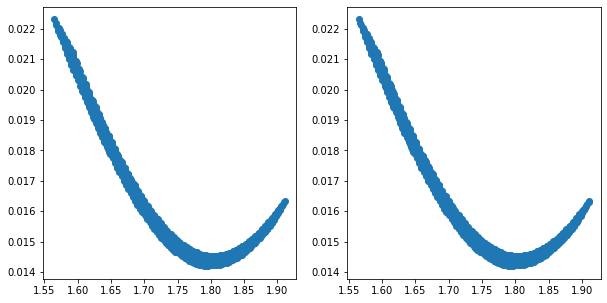

In [115]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(md[["NEH_x","pxt_x","RMSE_x","const_x"]].drop_duplicates().const_x,
            md[["NEH_x","pxt_x","RMSE_x","const_x"]].drop_duplicates().RMSE_x)
print(md[md.new_pxt_x<0].shape)
plt.subplot(1,2,2)
plt.scatter(md[["NEH_y","pxt_y","RMSE_y","const_y"]].drop_duplicates().const_y,
            md[["NEH_y","pxt_y","RMSE_y","const_y"]].drop_duplicates().RMSE_y)
print(md[md.new_pxt_x<0].shape)

In [116]:
md=md.sort_values(by=["RMSE"],ascending=True)
md=md[["NEH_x","pxt_x","RMSE_x","const_x","new_pxt_x","new_neh_x","NEH_y","pxt_y","RMSE_y","const_y","new_pxt_y","new_neh_y","RMSE"]]
md

,NEH_x,pxt_x,RMSE_x,const_x,new_pxt_x,new_neh_x,NEH_y,pxt_y,RMSE_y,const_y,new_pxt_y,new_neh_y,RMSE
214302,36,0.0499,0.014188,1.796410,0.006964,257.954355,36,0.0499,0.014188,1.796410,0.006964,257.954355,0.028376
214301,36,0.0499,0.014188,1.796410,0.006964,257.954355,36,0.0498,0.014195,1.792810,0.008954,200.229155,0.028383
213157,36,0.0498,0.014195,1.792810,0.008954,200.229155,36,0.0499,0.014188,1.796410,0.006964,257.954355,0.028383
213156,36,0.0498,0.014195,1.792810,0.008954,200.229155,36,0.0498,0.014195,1.792810,0.008954,200.229155,0.028391
214300,36,0.0499,0.014188,1.796410,0.006964,257.954355,36,0.0497,0.014208,1.789210,0.010944,163.494921,0.028396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,32,0.0491,0.021927,1.571208,0.131433,11.954403,32,0.0489,0.022307,1.564808,0.134971,11.593668,0.044234
12606,33,0.0475,0.022189,1.567508,0.133479,11.743491,33,0.0475,0.022189,1.567508,0.133479,11.743491,0.044378
1145,32,0.0490,0.022117,1.568008,0.133202,11.771649,32,0.0489,0.022307,1.564808,0.134971,11.593668,0.044423
1,32,0.0489,0.022307,1.564808,0.134971,11.593668,32,0.0490,0.022117,1.568008,0.133202,11.771649,0.044423


In [117]:
tempdata=md[md.RMSE<3*min(md.RMSE)]
tempdata=tempdata[(tempdata.new_pxt_x>0) & (tempdata.new_neh_x>0) &
                  (tempdata.new_pxt_y>0) & (tempdata.new_neh_y>0) &
                  (tempdata.new_neh_x<118) & (tempdata.new_neh_x<118)]
tempdata["pxt_dif"]=(abs((tempdata.pxt_x) - (tempdata.new_pxt_x))) +(abs((tempdata.pxt_y) - (tempdata.new_pxt_y))) #(abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2 
# plt.scatter(tempdata.const,tempdata.RMSE)

In [118]:
tempdata.sort_values(by=["pxt_dif"]).head(10)

,NEH_x,pxt_x,RMSE_x,const_x,new_pxt_x,new_neh_x,NEH_y,pxt_y,RMSE_y,const_y,new_pxt_y,new_neh_y,RMSE,pxt_dif
1272060,49,0.0356,0.015145,1.744401,0.035709,48.850263,49,0.0356,0.015145,1.744401,0.035709,48.850263,0.030290,0.000218
708228,42,0.0413,0.015172,1.734605,0.041123,42.180465,42,0.0413,0.015172,1.734605,0.041123,42.180465,0.030344,0.000353
877836,44,0.0395,0.015154,1.738004,0.039245,44.285916,44,0.0395,0.015154,1.738004,0.039245,44.285916,0.030308,0.000510
261288,37,0.0466,0.015255,1.724208,0.046870,36.786987,37,0.0466,0.015255,1.724208,0.046870,36.786987,0.030509,0.000540
1195278,48,0.0363,0.015163,1.742402,0.036814,47.329476,48,0.0363,0.015163,1.742402,0.036814,47.329476,0.030325,0.001029
438918,39,0.0443,0.015239,1.727707,0.044936,38.447986,39,0.0443,0.015239,1.727707,0.044936,38.447986,0.030479,0.001272
794178,43,0.0404,0.015143,1.737205,0.039687,43.772851,43,0.0404,0.015143,1.737205,0.039687,43.772851,0.030286,0.001427
531744,40,0.0433,0.015168,1.732006,0.042560,40.695698,40,0.0433,0.015168,1.732006,0.042560,40.695698,0.030336,0.001480
344946,38,0.0454,0.015267,1.725207,0.046318,37.247125,38,0.0454,0.015267,1.725207,0.046318,37.247125,0.030534,0.001835
132936,35,0.0491,0.015326,1.718509,0.050020,34.356487,35,0.0491,0.015326,1.718509,0.050020,34.356487,0.030653,0.001839


2 Files
===

In [11]:
time=24
files=[y for y in x if (f"_{time}_FAS_MOUSE.csv" in y) ]
pxts=np.unique(pd.read_csv(f"data/_AAMLGQEDPPQHGLPR_3_{time}_FAS_MOUSE.csv").pxt)
pxts_RMSE=dict()

# p_threshold=3

tmp_pxt=[]
temp=list(combinations(files, 2))
for fp in temp:
    
    data1=pd.read_csv("data/"+fp[0])
#     minrmse=min(data1.RMSE)
#     data1=data1[data1.RMSE < 1.2*minrmse]

    data2=pd.read_csv("data/"+fp[1])
#     minrmse=min(data2.RMSE)
#     data2=data2[data2.RMSE < 1.2*minrmse]
    
    md=data1.merge(data2,how='cross')
    md=md.query('pxt_x == pxt_y')
    md["RMSE"]= md["RMSE_x"] + md["RMSE_y"]
    mval=min(md["RMSE"])
    tmp_pxt.append(float(md[md.RMSE==mval].pxt_x))
    print(len(tmp_pxt))

1


In [12]:
np.median(tmp_pxt)

0.04990027

In [13]:
files

['_AAMLGQEDPPQHGLPR_3_24_FAS_MOUSE.csv',
 '_AcVDTALENLSTLK_2_24_FAS_MOUSE.csv',
 '_DPETLLGYSMVGcQR_2_24_FAS_MOUSE.csv',
 '_DTSFEQHVLLHTGGK_3_24_FAS_MOUSE.csv',
 '_GILLDALFEEANDSWR_2_24_FAS_MOUSE.csv',
 '_HTQPSSSGAQLcTVY_2_24_FAS_MOUSE.csv',
 '_LKEDTQVADVTTSR_3_24_FAS_MOUSE.csv',
 '_VYATILNAGTNTDGSK_2_24_FAS_MOUSE.csv']

In [14]:
md

,NEH_x,pxt_x,RMSE_x,theo_A1/A0_x,exp_A1/A0_x,theo_t_A1/A0_x,exp_t_A1/A0_x,NEH_y,pxt_y,RMSE_y,theo_A1/A0_y,exp_A1/A0_y,theo_t_A1/A0_y,exp_t_A1/A0_y,RMSE
0,32,0.0489,0.022307,0.937179,0.978597,2.582967,2.746752,32,0.0489,0.022307,0.937179,0.978597,2.582967,2.746752,0.044614
25,32,0.0489,0.022307,0.937179,0.978597,2.582967,2.746752,33,0.0489,0.019596,0.937179,0.978597,2.634398,2.746752,0.041903
63,32,0.0489,0.022307,0.937179,0.978597,2.582967,2.746752,34,0.0489,0.017290,0.937179,0.978597,2.685828,2.746752,0.039597
114,32,0.0489,0.022307,0.937179,0.978597,2.582967,2.746752,35,0.0489,0.015531,0.937179,0.978597,2.737259,2.746752,0.037837
177,32,0.0489,0.022307,0.937179,0.978597,2.582967,2.746752,36,0.0489,0.014473,0.937179,0.978597,2.788690,2.746752,0.036780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310721,49,0.0390,0.016334,0.937179,0.978597,2.926369,2.746752,45,0.0390,0.014852,0.937179,0.978597,2.763986,2.746752,0.031186
1310799,49,0.0390,0.016334,0.937179,0.978597,2.926369,2.746752,46,0.0390,0.014489,0.937179,0.978597,2.804582,2.746752,0.030824
1310875,49,0.0390,0.016334,0.937179,0.978597,2.926369,2.746752,47,0.0390,0.014646,0.937179,0.978597,2.845178,2.746752,0.030980
1310950,49,0.0390,0.016334,0.937179,0.978597,2.926369,2.746752,48,0.0390,0.015286,0.937179,0.978597,2.885773,2.746752,0.031620


In [6]:
times=[1,2,3,6,7,9,13,16,21,24,31]
for time in times: 
    files=[y for y in x if (f"_{time}_FAS_MOUSE.csv" in y) ]
    pxts=np.unique(pd.read_csv(f"_AAMLGQEDPPQHGLPR_3_{time}_FAS_MOUSE.csv").pxt)
    pxts_RMSE=dict()

    # p_threshold=3

    tmp_pxt=[]
    temp=list(combinations(files, 3))
    for fp in temp:
        
        try:
            
            data1=pd.read_csv(fp[0])
        #     minrmse=min(data1.RMSE)
        #     data1=data1[data1.RMSE < 1.2*minrmse]

            data2=pd.read_csv(fp[1])
        #     minrmse=min(data2.RMSE)
        #     data2=data2[data2.RMSE < 1.2*minrmse]

            md=data1.merge(data2,how='cross')
            md=md.query('pxt_x == pxt_y')
            md["RMSE"]= md["RMSE_x"] + md["RMSE_y"]
            mval=min(md["RMSE"])
            tmp_pxt.append(float(md[md.RMSE==mval].pxt_x)) 
            print("\t\t",time,len(tmp_pxt))
        except:
            continue
    print(time,"=>",np.median(tmp_pxt))
    

		 1 1
		 1 2
		 1 3
		 1 4
		 1 5
		 1 6
		 1 7
		 1 8
		 1 9
		 1 10
		 1 11
		 1 12
		 1 13
		 1 14
		 1 15
		 1 16
		 1 17
		 1 18
		 1 19
		 1 20
		 1 21
		 1 22
		 1 23
		 1 24
		 1 25
		 1 26
		 1 27
		 1 28
		 1 29
		 1 30
		 1 31
		 1 32
		 1 33
		 1 34
		 1 35
		 1 36
		 1 37
		 1 38
		 1 39
		 1 40
		 1 41
		 1 42
		 1 43
		 1 44
		 1 45
1 => 0.004699999
		 2 1
		 2 2
		 2 3
		 2 4
		 2 5
		 2 6
		 2 7
		 2 8
		 2 9
		 2 10
		 2 11
		 2 12
		 2 13
		 2 14
		 2 15
		 2 16
		 2 17
		 2 18
		 2 19
		 2 20
		 2 21
		 2 22
		 2 23
		 2 24
		 2 25
		 2 26
		 2 27
		 2 28
		 2 29
		 2 30
		 2 31
		 2 32
		 2 33
		 2 34
		 2 35
		 2 36
		 2 37
		 2 38
		 2 39
		 2 40
		 2 41
		 2 42
		 2 43
		 2 44
		 2 45
		 2 46
		 2 47
		 2 48
		 2 49
		 2 50
		 2 51
		 2 52
		 2 53
		 2 54
		 2 55
		 2 56
2 => 0.009299992
		 3 1
		 3 2
		 3 3
		 3 4
		 3 5
		 3 6
		 3 7
		 3 8
		 3 9
		 3 10
		 3 11
		 3 12
		 3 13
		 3 14
		 3 15
		 3 16
		 3 17
		 3 18
		 3 19
		 3 20
		 3 21
		 3 22
		 3 23
	

In [ ]:
1 => 0.004699999
2 => 0.009299992
3 => 0.009399991
6 => 0.046800215
7 => 0.0398501
9 => 0.04860025
13 => 0.03980010
16 => 0.04910026
21 => 0.04860025
24 => 0.03760006
31 => 0.03710005

3 Files
===

In [3]:
time=31
files=[y for y in x if (f"_{time}_FAS_MOUSE.csv" in y) ]
pxts=np.unique(pd.read_csv(f"_AAMLGQEDPPQHGLPR_3_{time}_FAS_MOUSE.csv").pxt)
pxts_RMSE=dict()

# p_threshold=3

tmp_pxt=[]
temp=list(combinations(files, 3))
for fp in temp:
    
    data1=pd.read_csv(fp[0])[["NEH","pxt","RMSE"]]
    minrmse=min(data1.RMSE)
    data1=data1[data1.RMSE < (10*minrmse)]

    data2=pd.read_csv(fp[1])[["NEH","pxt","RMSE"]]
    minrmse=min(data2.RMSE)
    data2=data2[data2.RMSE < (10*minrmse)]

    md=data1.merge(data2,how='cross')
    md=md.query('pxt_x == pxt_y')
    md["RMSE"]= md["RMSE_x"] + md["RMSE_y"]
    mval=min(md["RMSE"])
    md[md.RMSE==mval]

    data3=pd.read_csv(fp[2])[["NEH","pxt","RMSE"]]
    minrmse=min(data3.RMSE)
    data3=data3[data3.RMSE < (10*minrmse)]

    md2=md.merge(data3,how='cross',suffixes =['_1','_2'])
    md2=md2.query('pxt_x == pxt')
    md2["RMSE"]= md2["RMSE_1"] + md2["RMSE_2"]
    mval=min(md2["RMSE"])
    md2[md2.RMSE==mval]
    tmp_pxt.append(float(md2[md2.RMSE==mval].pxt_x))
    print(len(tmp_pxt))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [4]:
np.median(tmp_pxt)

0.04330016

In [5]:
times=[1,2,3,6,7,9,13,16,21,24,31]
for time in times: 
    files=[y for y in x if (f"_{time}_FAS_MOUSE.csv" in y) ]
    pxts=np.unique(pd.read_csv(f"_AAMLGQEDPPQHGLPR_3_{time}_FAS_MOUSE.csv").pxt)
    pxts_RMSE=dict()

    # p_threshold=3

    tmp_pxt=[]
    temp=list(combinations(files, 3))
    for fp in temp:
        
        try:
            data1=pd.read_csv(fp[0])[["NEH","pxt","RMSE"]]
            minrmse=min(data1.RMSE)
            data1=data1[data1.RMSE < (10*minrmse)]

            data2=pd.read_csv(fp[1])[["NEH","pxt","RMSE"]]
            minrmse=min(data2.RMSE)
            data2=data2[data2.RMSE < (10*minrmse)]

            md=data1.merge(data2,how='cross')
            md=md.query('pxt_x == pxt_y')
            md["RMSE"]= md["RMSE_x"] + md["RMSE_y"]
            mval=min(md["RMSE"])
            md[md.RMSE==mval]

            data3=pd.read_csv(fp[2])[["NEH","pxt","RMSE"]]
            minrmse=min(data3.RMSE)
            data3=data3[data3.RMSE < (10*minrmse)]

            md2=md.merge(data3,how='cross',suffixes =['_1','_2'])
            md2=md2.query('pxt_x == pxt')
            md2["RMSE"]= md2["RMSE_1"] + md2["RMSE_2"]
            mval=min(md2["RMSE"])
            md2[md2.RMSE==mval]
            tmp_pxt.append(float(md2[md2.RMSE==mval].pxt_x))
            print("\t\t",time,len(tmp_pxt))
        except:
            continue
    print(time,"=>",np.median(tmp_pxt))
    

		 1 1
		 1 2
		 1 3
		 1 4
		 1 5
		 1 6
		 1 7
		 1 8
		 1 9
		 1 10
		 1 11
		 1 12
		 1 13
		 1 14
		 1 15
		 1 16
		 1 17
		 1 18
		 1 19
		 1 20
		 1 21
		 1 22
		 1 23
		 1 24
		 1 25
		 1 26
		 1 27
		 1 28
		 1 29
		 1 30
		 1 31
		 1 32
		 1 33
		 1 34
		 1 35
1 => 0.004699999
		 2 1
		 2 2
		 2 3
		 2 4
		 2 5
		 2 6
		 2 7
		 2 8
		 2 9
		 2 10
		 2 11
		 2 12
		 2 13
		 2 14
		 2 15
		 2 16
		 2 17
		 2 18
		 2 19
		 2 20
		 2 21
		 2 22
		 2 23
		 2 24
		 2 25
		 2 26
		 2 27
		 2 28
		 2 29
		 2 30
		 2 31
		 2 32
		 2 33
		 2 34
		 2 35
		 2 36
		 2 37
		 2 38
		 2 39
		 2 40
		 2 41
		 2 42
		 2 43
		 2 44
		 2 45
		 2 46
		 2 47
		 2 48
		 2 49
		 2 50
		 2 51
		 2 52
		 2 53
		 2 54
		 2 55
		 2 56
2 => 0.0093999915
		 3 1
		 3 2
		 3 3
		 3 4
		 3 5
		 3 6
		 3 7
		 3 8
		 3 9
		 3 10
		 3 11
		 3 12
		 3 13
		 3 14
		 3 15
		 3 16
		 3 17
		 3 18
		 3 19
		 3 20
		 3 21
		 3 22
		 3 23
		 3 24
		 3 25
		 3 26
		 3 27
		 3 28
		 3 29
		 3 30
		 3 31
		 3 32
		 3 33


In [ ]:
1 => 0.004699999
2 => 0.0093999915
3 => 0.008949992
6 => 0.04360016
7 => 0.03329999
9 => 0.04620021
13 => 0.04040011
16 => 0.04870025
21 => 0.04670022
24 => 0.04150013
31 => 0.04330016

Four files
===

In [16]:
time=31
files=[y for y in x if (f"_{time}_FAS_MOUSE.csv" in y) ]
pxts=np.unique(pd.read_csv(f"data/_AAMLGQEDPPQHGLPR_3_{time}_FAS_MOUSE.csv").pxt)
pxts_RMSE=dict()

# p_threshold=3

tmp_pxt=[]
temp=list(combinations(files, 4))
for fp in temp:
    
    data1=pd.read_csv("data/"+fp[0])[["NEH","pxt","RMSE"]]
    minrmse=min(data1.RMSE)
    data1=data1[data1.RMSE < (10*minrmse)]

    data2=pd.read_csv("data/"+fp[1])[["NEH","pxt","RMSE"]]
    minrmse=min(data2.RMSE)
    data2=data2[data2.RMSE < (10*minrmse)]

    md=data1.merge(data2,how='cross')
    md=md.query('pxt_x == pxt_y')
    md["RMSE"]= md["RMSE_x"] + md["RMSE_y"]
    mval=min(md["RMSE"])
    md[md.RMSE==mval]

    data3=pd.read_csv("data/"+fp[2])[["NEH","pxt","RMSE"]]
    minrmse=min(data3.RMSE)
    data3=data3[data3.RMSE < (10*minrmse)]

    md2=md.merge(data3,how='cross',suffixes =['_1','_2'])
    md2=md2.query('pxt_x == pxt')
    md2["RMSE"]= md2["RMSE_1"] + md2["RMSE_2"]
    mval=min(md2["RMSE"])
    md2[md2.RMSE==mval]
    

    data4=pd.read_csv("data/"+fp[3])[["NEH","pxt","RMSE"]]
    minrmse=min(data4.RMSE)
    data4=data4[data4.RMSE < (10*minrmse)]
    
    md2=md2.merge(data4,how='cross',suffixes =['_11','_21'])
    md2=md2.query('pxt_x == pxt_21')
    md2["RMSE"]= md2["RMSE_11"] + md2["RMSE_21"]
    mval=min(md2["RMSE"])
    md2[md2.RMSE==mval]
    
    
    tmp_pxt.append(float(md2[md2.RMSE==mval].pxt_x))
    print(len(tmp_pxt))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


In [17]:
np.median(tmp_pxt)

0.04330016

In [8]:
times=[1,2,3,6,7,9,13,16,21,24,31]
for time in times: 
    files=[y for y in x if (f"_{time}_FAS_MOUSE.csv" in y) ]
    pxts=np.unique(pd.read_csv(f"data/_AAMLGQEDPPQHGLPR_3_{time}_FAS_MOUSE.csv").pxt)
    pxts_RMSE=dict()

    # p_threshold=3

    tmp_pxt=[]
    temp=list(combinations(files, 4))
    for fp in temp:
        
        try:
            data1=pd.read_csv("data/"+fp[0])[["NEH","pxt","RMSE"]]
            minrmse=min(data1.RMSE)
            data1=data1[data1.RMSE < (10*minrmse)]

            data2=pd.read_csv("data/"+fp[1])[["NEH","pxt","RMSE"]]
            minrmse=min(data2.RMSE)
            data2=data2[data2.RMSE < (10*minrmse)]

            md=data1.merge(data2,how='cross')
            md=md.query('pxt_x == pxt_y')
            md["RMSE"]= md["RMSE_x"] + md["RMSE_y"]
            mval=min(md["RMSE"])
            md[md.RMSE==mval]

            data3=pd.read_csv("data/"+fp[2])[["NEH","pxt","RMSE"]]
            minrmse=min(data3.RMSE)
            data3=data3[data3.RMSE < (10*minrmse)]

            md2=md.merge(data3,how='cross',suffixes =['_1','_2'])
            md2=md2.query('pxt_x == pxt')
            md2["RMSE"]= md2["RMSE_1"] + md2["RMSE_2"]
            mval=min(md2["RMSE"])
            md2[md2.RMSE==mval]


            data4=pd.read_csv("data/"+fp[3])[["NEH","pxt","RMSE"]]
            minrmse=min(data4.RMSE)
            data4=data4[data4.RMSE < (10*minrmse)]

            md2=md2.merge(data4,how='cross',suffixes =['_11','_21'])
            md2=md2.query('pxt_x == pxt_21')
            md2["RMSE"]= md2["RMSE_11"] + md2["RMSE_21"]
            mval=min(md2["RMSE"])
            md2[md2.RMSE==mval]
            tmp_pxt.append(float(md2[md2.RMSE==mval].pxt_x))
            print("\t\t",time,len(tmp_pxt))
        except:
            continue
    print(time,"=>",np.median(tmp_pxt))
    

		 1 1
		 1 2
		 1 3
		 1 4
		 1 5
		 1 6
		 1 7
		 1 8
		 1 9
		 1 10
		 1 11
		 1 12
		 1 13
		 1 14
		 1 15
		 1 16
		 1 17
		 1 18
		 1 19
		 1 20
		 1 21
		 1 22
		 1 23
		 1 24
		 1 25
		 1 26
		 1 27
		 1 28
		 1 29
		 1 30
		 1 31
		 1 32
		 1 33
		 1 34
		 1 35
1 => 0.005099999
		 2 1
		 2 2
		 2 3
		 2 4
		 2 5
		 2 6
		 2 7
		 2 8
		 2 9
		 2 10
		 2 11
		 2 12
		 2 13
		 2 14
		 2 15
		 2 16
		 2 17
		 2 18
		 2 19
		 2 20
		 2 21
		 2 22
		 2 23
		 2 24
		 2 25
		 2 26
		 2 27
		 2 28
		 2 29
		 2 30
		 2 31
		 2 32
		 2 33
		 2 34
		 2 35
		 2 36
		 2 37
		 2 38
		 2 39
		 2 40
		 2 41
		 2 42
		 2 43
		 2 44
		 2 45
		 2 46
		 2 47
		 2 48
		 2 49
		 2 50
		 2 51
		 2 52
		 2 53
		 2 54
		 2 55
		 2 56
		 2 57
		 2 58
		 2 59
		 2 60
		 2 61
		 2 62
		 2 63
		 2 64
		 2 65
		 2 66
		 2 67
		 2 68
		 2 69
		 2 70
2 => 0.01149999
		 3 1
		 3 2
		 3 3
		 3 4
		 3 5
		 3 6
		 3 7
		 3 8
		 3 9
		 3 10
		 3 11
		 3 12
		 3 13
		 3 14
		 3 15
		 3 16
		 3 17
		 3 18
		 3 19
		

In [ ]:
time=24
files=[y for y in x if (f"_{time}_FAS_MOUSE.csv" in y) ]
pxts=np.unique(pd.read_csv(f"_AAMLGQEDPPQHGLPR_3_{time}_FAS_MOUSE.csv").pxt)
pxts_RMSE=dict()

# p_threshold=3

tmp_pxt=[]
temp=list(combinations(files, 2))
for fp in temp:
    
    data1=pd.read_csv(fp[0])
#     minrmse=min(data1.RMSE)
#     data1=data1[data1.RMSE < 1.2*minrmse]

    data2=pd.read_csv(fp[1])
#     minrmse=min(data2.RMSE)
#     data2=data2[data2.RMSE < 1.2*minrmse]
    
    md=data1.merge(data2,how='cross')
    md=md.query('pxt_x == pxt_y')
    md["RMSE"]= md["RMSE_x"] + md["RMSE_y"]
    mval=min(md["RMSE"])
    tmp_pxt.append(float(md[md.RMSE==mval].pxt_x))
    print(len(tmp_pxt))

In [279]:
time=21
x=os.listdir()
x=[y for y in x if ((".csv" in y) and (y[0]=='_'))]
files=[y for y in x if (f"_{time}_CPSM_MOUSE.csv" in y) ] 
pxts=np.unique(pd.read_csv(f"_AFAISGPFNVQFLVK_2_{time}_CPSM_MOUSE.csv").pxt)
pxts_RMSE=dict()

# p_threshold=3

tmp_pxt=[]
temp=list(combinations(files, 2))
for fp in temp:
    try:
        data1=pd.read_csv(fp[0])
        minrmse=min(data1.RMSE)
        data1=data1[data1.RMSE < 1.2*minrmse]

        data2=pd.read_csv(fp[1])
        minrmse=min(data2.RMSE)
        data2=data2[data2.RMSE < 1.2*minrmse]

        md=data1.merge(data2,how='cross')
        md=md.query('pxt_x == pxt_y')
        md["RMSE"]= md["RMSE_x"] + md["RMSE_y"]
        mval=min(md["RMSE"])
        tmp_pxt.append(float(md[md.RMSE==mval].pxt_x))
        print(len(tmp_pxt))
    except:
        print()

1
2
3
4
5

6
7
8
9
10
11
12
13
14
15
16
17

18
19
20
21
22

23
24
25
26
27
28
29
30
31
32
33
34

35
36
37
38

39
40
41
42
43
44
45
46
47
48
49
50

51
52
53

54
55
56
57
58
59
60
61
62
63
64
65

66
67

68
69
70
71
72
73
74
75
76
77
78
79

80

81
82
83
84
85
86
87
88
89
90
91
92

93














94
95
96
97
98
99
100
101
102
103
104

105
106
107
108
109
110
111
112
113
114
115

116
117
118
119
120
121
122
123
124
125

126
127
128
129
130
131
132
133
134

135
136
137
138
139
140
141
142

143
144
145
146
147
148
149

150
151
152
153
154
155

156
157
158
159
160

161
162
163
164

165
166
167

168
169

170

171



In [280]:
np.median(tmp_pxt)

0.02389997

In [163]:
time=6
files=[y for y in x if (f"_{time}_CPSM_MOUSE.csv" in y) ]
pxts=np.unique(pd.read_csv(f"_AAMLGQEDPPQHGLPR_3_{time}_FAS_MOUSE.csv").pxt)
pxts_RMSE=dict()

data1=pd.read_csv(files[0])
data2=pd.read_csv(files[1])
md=data1.merge(data2,how='cross')
md=md.query('pxt_x == pxt_y')
md["RMSE"]= md["RMSE_x"] + md["RMSE_y"]
mval=min(md["RMSE"])
md[md.RMSE==mval]

,NEH_x,pxt_x,RMSE_x,NEH_y,pxt_y,RMSE_y,RMSE
4873303,44,0.01,0.011693,49,0.01,0.01174,0.023433


In [164]:
tmp_pxt=[]
temp=list(combinations(files, 2))
for fp in temp:
    try:
        data1=pd.read_csv(fp[0])
        data2=pd.read_csv(fp[1])
        md=data1.merge(data2,how='cross')
        md=md.query('pxt_x == pxt_y')
        md["RMSE"]= md["RMSE_x"] + md["RMSE_y"]
        mval=min(md["RMSE"])
        tmp_pxt.append(float(md[md.RMSE==mval].pxt_x))
        print(len(tmp_pxt))
    except:
        print(fp)

1
2
3
4
5
('_AFAISGPFNVQFLVK_2_6_CPSM_MOUSE.csv', '_FDEHGIMVLGcGPY_2_6_CPSM_MOUSE.csv')
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
('_AFAISGPFNVQFLVK_2_6_CPSM_MOUSE.csv', '_TSAcFEPSLDYMVTK_2_6_CPSM_MOUSE.csv')
26
27
28
29
30
31
32
33
('_AFAISGPFNVQFLVK_3_6_CPSM_MOUSE.csv', '_FDEHGIMVLGcGPY_2_6_CPSM_MOUSE.csv')
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
('_AFAISGPFNVQFLVK_3_6_CPSM_MOUSE.csv', '_TSAcFEPSLDYMVTK_2_6_CPSM_MOUSE.csv')
54
55
56
57
58
59
60
('_ANPIIGNGGAPDTTAR_2_6_CPSM_MOUSE.csv', '_FDEHGIMVLGcGPY_2_6_CPSM_MOUSE.csv')
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
('_ANPIIGNGGAPDTTAR_2_6_CPSM_MOUSE.csv', '_TSAcFEPSLDYMVTK_2_6_CPSM_MOUSE.csv')
81
82
83
84
85
86
('_DGSIDLVINLPNNNTK_2_6_CPSM_MOUSE.csv', '_FDEHGIMVLGcGPY_2_6_CPSM_MOUSE.csv')
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
('_DGSIDLVINLPNNNTK_2_6_CPSM_MOUSE.csv', '_TSAcFEPSLDYMVTK_2_6_CPSM_MOUSE.csv')
107
108
109
110
111
('_DGSIDLVINLPNNNTK_3_6_CPSM_MOU

In [165]:
np.median(tmp_pxt)

0.011

In [21]:
# md=md.merge(data3,how='cross',suffixes =['_1','_2'])

In [22]:
# md=md.query('pxt_x == pxt')

In [23]:
# md.head()

In [12]:
md["RMSE"]= md["RMSE_1"] + md["RMSE_2"]

In [28]:
mval=min(md["RMSE"])

In [29]:
mval

0.0424163846805624

In [30]:
md[md.RMSE==mval]

,NEH_x,pxt_x,RMSE_x,NEH_y,pxt_y,RMSE_y,RMSE
5492815,49,0.034,0.017236,19,0.034,0.02518,0.042416


In [5]:
files[1]

'_AcVDTALENLSTLK_2_9_FAS_MOUSE.csv'

In [ ]:
for t_pxt in pxts:
    for n in range(1,50):
        for n2 in range(1,50):          
            for n3 in range(1,50):
                pxts_RMSE[str(t_pxt)+"_"+str(n)+"_"+str(n2)+"_"+str(n3)]=(float(data1[(data1.pxt==t_pxt)&(data1.NEH==n)].RMSE)+ 
                                                          float(data2[(data2.pxt==t_pxt)&(data2.NEH==n2)].RMSE.astype("float"))+
                                                         float(data3[(data3.pxt==t_pxt)&(data3.NEH==n3)].RMSE.astype("float")))
            
            

In [ ]:
minvalue= min(pxts_RMSE.values())
[x for x in pxts_RMSE.items() if x[1]==minvalue]

In [ ]:
minvalue

In [ ]:
for file in files[:2]:
    data=pd.read_csv(file)
    
#     fig = plt.figure() 
#     ax = fig.add_subplot(projection='3d')
#     ax.scatter(data.NEH, data.pxt, data.RMSE,c=data.RMSE)
#     ax.view_init(10,120)
#     ax.set_xlabel('NEH')
#     ax.set_ylabel('px(t)')
#     ax.set_zlabel('RMSE')
#     ax.figure.set_size_inches(6,6)

    fig = plt.figure() 
    ax = fig.add_subplot(projection='3d')
    ax.scatter(data.NEH, data.pxt, data.RMSE,c=data.RMSE)
#     ax.view_init(-120,120)
    ax.view_init(0,0)
    ax.set_xlabel('NEH')
    ax.set_ylabel('px(t)')
    ax.set_zlabel('RMSE')
    ax.figure.set_size_inches(7,7)
    print("==================================================")
    print(f"=================: {file}========================")
    print("==================================================")
    
    plt.show()
    
    for t_pxt in pxts:
        try:
            pxts_RMSE[t_pxt]=pxts_RMSE.get(t_pxt,0)+min(data[data.pxt==t_pxt].RMSE.astype("float"))     
        except:
            print(file)
        

In [ ]:
min(pxts_RMSE.values())
[x for x in pxts_RMSE.items() if x[1]==min(pxts_RMSE.values())]

In [ ]:
plt.scatter(pxts_RMSE.keys(),pxts_RMSE.values())

In [ ]:
# time=[1,2,3,6,7,9,13,16,21,24,31]
# for t in time:
#     data=pd.read_csv(f"_MEAEcLSESTALQK_2_{t}.csv")
#     data.head()
    

#     fig = plt.figure() 
#     ax = fig.add_subplot(projection='3d')
#     ax.scatter(data.NEH, data.pxt, data.RMSE,c=data.RMSE)
#     ax.view_init(10,120)
#     ax.set_xlabel('NEH')
#     ax.set_ylabel('px(t)')
#     ax.set_zlabel('RMSE')
#     ax.figure.set_size_inches(6,6)

#     fig = plt.figure() 
#     ax = fig.add_subplot(projection='3d')
#     ax.scatter(data.NEH, data.pxt, data.RMSE,c=data.RMSE)
#     ax.view_init(-120,120)
#     ax.set_xlabel('NEH')
#     ax.set_ylabel('px(t)')
#     ax.set_zlabel('RMSE')
#     ax.figure.set_size_inches(7,7)
    
#     plt.show()
    
#     print("==================================================")
#     print(f"=================Time: {t}========================")
#     print("==================================================")